## Download The Dataset

In [1]:
from google.colab import files #This cell is used when running this code on Google Colab Platform
#uploaded = files.upload()

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

## Processing The Dataset

In [3]:
my_dataset = pd.read_csv('breast-cancer-wisconsin.csv', names=['ID','1st dim','2nd dim','3rd dim','4th dim','5th dim','6th dim','7th dim','8th dim','9th dim','Label'])
my_dataset.drop(labels=['ID'], axis=1)

le = LabelEncoder()
my_dataset['Label']= le.fit_transform(my_dataset['Label'])

X = my_dataset.drop(labels=['Label','ID'], axis=1)
y = my_dataset['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=400,shuffle=False)

## RMS Function

In [4]:
def r_m_s (Classifier):
  p = Classifier.predict_proba(X_test)
  pmax=[]
  diff=[]
  p_correct=[]
  SUM = 0
  for i in range (len(y_test)):
    pmax.append(np.max(p[i]))
    diff = y_pred_LR - y_test
    if diff[i+400] == 0:
      p_correct.append(pmax[i])
      SUM = SUM + np.square(p_correct[-1]-0.5)
  R_M_S = np.sqrt(SUM/len(p_correct))
  print ("root-mean-square error around 0.5 for ",  Classifier, "is ", R_M_S)
  return R_M_S

## Weighted Cost Function

In [5]:
def w_c_f (prediction):
  cm = confusion_matrix(y_test, prediction)
  c1 = cm[0,1]
  c100 = cm[1,0]*100
  ci = c1+c100
  c = ci/6916
  print("The Weighted Cost value is: ", c)
  return c

## A) Logistic Regression

In [6]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)
LR_confusion = confusion_matrix(y_test, y_pred_LR)
LR_misclassification = 1 - accuracy_score(y_test, y_pred_LR)
print ("Accuracy : ", accuracy_score(y_test, y_pred_LR))
print ("Logistic Regression misclassification rate : ", LR_misclassification)
RMS_LR = r_m_s (LR)
print ("Logistic Regression RMS around 0.5 is : ", RMS_LR)

Accuracy :  0.9893992932862191
Logistic Regression misclassification rate :  0.010600706713780883
root-mean-square error around 0.5 for  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is  0.47834185825002434
Logistic Regression RMS around 0.5 is :  0.47834185825002434


## B) KNN

K nearest neighbours misclassification rate :  [0.017667844522968212, 0.02473498233215543, 0.014134275618374548, 0.017667844522968212, 0.017667844522968212, 0.010600706713780883, 0.014134275618374548, 0.010600706713780883, 0.010600706713780883, 0.010600706713780883]


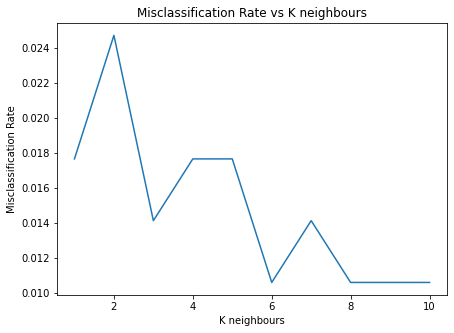

In [7]:
KNN_misclassification = []
for i in range(10):
  KNN = KNeighborsClassifier(n_neighbors=i+1)
  KNN.fit(X_train,y_train)
  y_pred_KNN = KNN.predict(X_test)
  KNN_misclassification.append(1 - accuracy_score(y_test, y_pred_KNN))
plt.figure(figsize=(7,5))
plt.plot(range(1,11), KNN_misclassification)
plt.title('Misclassification Rate vs K neighbours')
plt.xlabel('K neighbours')
plt.ylabel('Misclassification Rate')
print ("K nearest neighbours misclassification rate : ", KNN_misclassification)

## C) LDA

In [8]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_pred_LDA = clf.predict(X_test)
LDA_Misclassification = (1 - accuracy_score(y_test, y_pred_LDA))
print ("linear discriminant analysis misclassification rate : ", LDA_Misclassification)

linear discriminant analysis misclassification rate :  0.017667844522968212


## D) SVM

In [9]:
#linear SVM
svclassifier_linear = SVC(kernel='linear', probability=True)
svclassifier_linear.fit(X_train, y_train)
y_pred_SVM_linear = svclassifier_linear.predict(X_test)
LSVM_Misclassification = (1 - accuracy_score(y_test, y_pred_SVM_linear))
print ("linear Support Vector Machine misclassification rate : ", LSVM_Misclassification)

#polynomial SVM
PSVM_Misclassification=[]
for j in range (2,6):
  svclassifier_poly = SVC(kernel='poly', degree = j, probability=True)
  svclassifier_poly.fit(X_train, y_train)
  y_pred_SVM_poly = svclassifier_poly.predict(X_test)
  PSVM_Misclassification.append((1 - accuracy_score(y_test, y_pred_SVM_poly)))
  print ("Poly Support Vector Machine misclassification rate : ", PSVM_Misclassification[-1], "for degree = ", j)

#rbf SVM
svclassifier_rbf = SVC(probability=True)
svclassifier_rbf.fit(X_train, y_train)
y_pred_SVM_rbf = svclassifier_rbf.predict(X_test)
RSVM_Misclassification = (1 - accuracy_score(y_test, y_pred_SVM_rbf))
print ("rbf Support Vector Machine misclassification rate : ", RSVM_Misclassification)

#sigmoid SVM
svclassifier_sigmoid = SVC(kernel='sigmoid', probability=True)
svclassifier_sigmoid.fit(X_train, y_train)
y_pred_SVM_sigmoid = svclassifier_sigmoid.predict(X_test)
SSVM_Misclassification = (1 - accuracy_score(y_test, y_pred_SVM_sigmoid))
print ("sigmoid Support Vector Machine misclassification rate : ", SSVM_Misclassification)

linear Support Vector Machine misclassification rate :  0.014134275618374548
Poly Support Vector Machine misclassification rate :  0.010600706713780883 for degree =  2
Poly Support Vector Machine misclassification rate :  0.010600706713780883 for degree =  3
Poly Support Vector Machine misclassification rate :  0.035335689045936425 for degree =  4
Poly Support Vector Machine misclassification rate :  0.035335689045936425 for degree =  5
rbf Support Vector Machine misclassification rate :  0.017667844522968212
sigmoid Support Vector Machine misclassification rate :  0.8374558303886925


In [10]:
RMS_LSVM = r_m_s (svclassifier_linear)
print ("Linear SVM RMS around 0.5 is : ", RMS_LSVM, "\n")

RMS_PSVM=[]
for j in range (2,6):
  svclassifier_poly = SVC(kernel='poly', degree = j, probability=True)
  svclassifier_poly.fit(X_train, y_train)
  y_pred_SVM_poly = svclassifier_poly.predict(X_test)
  RMS_PSVM.append(r_m_s (svclassifier_poly))
  print ("\nPoly SVM RMS around 0.5 is : ", RMS_PSVM[-1], 'at degree:', j, "\n")

RMS_RSVM = r_m_s (svclassifier_rbf)
print ("\nrbf SVM RMS around 0.5 is : ", RMS_RSVM, "\n")

RMS_SSVM = r_m_s (svclassifier_sigmoid)
print ("\nsigmoid SVM RMS around 0.5 is : ", RMS_SSVM, "\n")

root-mean-square error around 0.5 for  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False) is  0.46717603285387543
Linear SVM RMS around 0.5 is :  0.46717603285387543 

root-mean-square error around 0.5 for  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False) is  0.4483849325653634

Poly SVM RMS around 0.5 is :  0.4483849325653634 at degree: 2 

root-mean-square error around 0.5 for  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=T

In [11]:
Smallest = min(RMS_LR, RMS_LSVM, min(RMS_PSVM), RMS_RSVM, RMS_SSVM)
Largest = max(RMS_LR, RMS_LSVM, max(RMS_PSVM), RMS_RSVM, RMS_SSVM)
print("Smallest RMS around 0.5 is ", Smallest) #For 5 degree Polynomial SVM Classifier
print("Largest RMS around 0.5 is ", Largest) #For Logistic Regression Classifier

Smallest RMS around 0.5 is  0.37080359071124175
Largest RMS around 0.5 is  0.47834185825002434


The Classifier with the **Smallest** Root Mean Square Value around 0.5 was the **5 degree Polynomial SVM Classifier** at **0.38048211709198326**.

While The Classifier with the **Largest** Root Mean Square Value around 0.5 was the **Logistic Regression Classifier** at **0.47834185825002434**, Which is considered to be the **best Classifier in terms of Root Mean Square Value around 0.5**

## E) Decision Tree

In [12]:
DT_misclassification = []
for k in range(3,11):
  decision_tree = tree.DecisionTreeClassifier(max_depth= k)
  decision_tree.fit(X_train,y_train)
  y_pred_DT = decision_tree.predict(X_test)
  DT_misclassification.append(1 - accuracy_score(y_test, y_pred_DT))
  if k == 5:
    graph_data = tree.export_graphviz(decision_tree, out_file=None) 
    graph = graphviz.Source(graph_data)
print ("decision tree misclassification rate : ", DT_misclassification)

decision tree misclassification rate :  [0.035335689045936425, 0.02473498233215543, 0.05300353356890464, 0.04946996466431097, 0.04946996466431097, 0.04240282685512364, 0.04946996466431097, 0.05653710247349819]


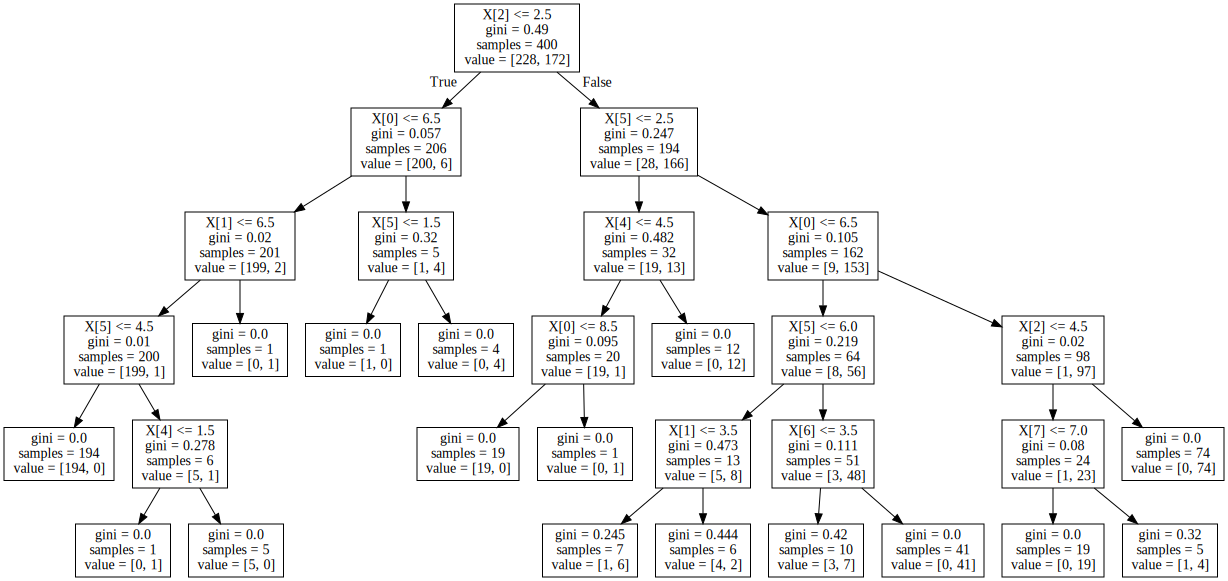

In [13]:
graph

## F) AdaBoost, XGBoost, and Random Forest classifers.

In [14]:
ADA_misclassification =[]
XGB_misclassification =[]
RF_misclassification =[]
for n in range (1,6):
  Ada_Boost = AdaBoostClassifier(n_estimators=n*100)
  XG_Boost = XGBClassifier(n_estimators=n*100)
  RF_Classifier = RandomForestClassifier(n_estimators=n*100)
  Ada_Boost.fit(X_train,y_train)
  XG_Boost.fit(X_train,y_train)
  RF_Classifier.fit(X_train,y_train)
  y_pred_ADA = Ada_Boost.predict(X_test)
  y_pred_XG = XG_Boost.predict(X_test)
  y_pred_RF = RF_Classifier.predict(X_test)
  ADA_misclassification.append(1 - accuracy_score(y_test, y_pred_ADA))
  XGB_misclassification.append(1 - accuracy_score(y_test, y_pred_XG))
  RF_misclassification.append(1 - accuracy_score(y_test, y_pred_RF))
  print ("ADA Boost misclassification rate     : ", ADA_misclassification[-1], "for", n*100, "learners")
  print ("XGB Boost misclassification rate     : ", XGB_misclassification[-1], "for", n*100, "learners")
  print ("Random Forest misclassification rate : ", RF_misclassification[-1], "for", n*100, "learners")

ADA Boost misclassification rate     :  0.03886925795053009 for 100 learners
XGB Boost misclassification rate     :  0.021201413427561877 for 100 learners
Random Forest misclassification rate :  0.017667844522968212 for 100 learners
ADA Boost misclassification rate     :  0.03886925795053009 for 200 learners
XGB Boost misclassification rate     :  0.017667844522968212 for 200 learners
Random Forest misclassification rate :  0.014134275618374548 for 200 learners
ADA Boost misclassification rate     :  0.04946996466431097 for 300 learners
XGB Boost misclassification rate     :  0.017667844522968212 for 300 learners
Random Forest misclassification rate :  0.014134275618374548 for 300 learners
ADA Boost misclassification rate     :  0.03886925795053009 for 400 learners
XGB Boost misclassification rate     :  0.017667844522968212 for 400 learners
Random Forest misclassification rate :  0.014134275618374548 for 400 learners
ADA Boost misclassification rate     :  0.04240282685512364 for 500 

## G) Comparison

In [15]:
print("For Logistic Regression Classifier")
LR_cost = w_c_f(y_pred_LR)

print("\nFor K Nearest Neighbours Classifier")
KNN_cost=[]
for i in range(10):
  KNN = KNeighborsClassifier(n_neighbors=i+1)
  KNN.fit(X_train,y_train)
  y_pred_KNN = KNN.predict(X_test)
  KNN_cost.append(w_c_f(y_pred_KNN))
  print('at ', i+1, "neighbours \n")

print("\nFor Linear Discriminant Classifier")
LDA_cost = w_c_f(y_pred_LDA)

print("\nFor linear SVM Classifier")
LSVM_cost = w_c_f(y_pred_SVM_linear)

print("\nFor polynomial SVM Classifier")
PSVM_cost=[]
for j in range (2,6):
  svclassifier_poly = SVC(kernel='poly', degree = j, probability=True)
  svclassifier_poly.fit(X_train, y_train)
  y_pred_SVM_poly = svclassifier_poly.predict(X_test)
  PSVM_cost.append(w_c_f(y_pred_SVM_poly))
  print('at drgree =', j, "\n")

print("\nFor rbf SVM Classifier")
RSVM_cost = w_c_f(y_pred_SVM_rbf)

print("\nFor sigmoid SVM Classifier")
SSVM_cost = w_c_f(y_pred_SVM_sigmoid)

DT_cost=[]
for k in range(3,11):
  decision_tree = tree.DecisionTreeClassifier(max_depth= k)
  decision_tree.fit(X_train,y_train)
  y_pred_DT = decision_tree.predict(X_test)
  print("\nFor Decision Tree Classifier")
  DT_cost.append(w_c_f(y_pred_DT))
  print('at depth =', k, "\n")

ADA_cost=[]
XG_cost=[]
RF_cost=[]
for n in range (1,6):
  Ada_Boost = AdaBoostClassifier(n_estimators=n*100)
  XG_Boost = XGBClassifier(n_estimators=n*100)
  RF_Classifier = RandomForestClassifier(n_estimators=n*100)
  Ada_Boost.fit(X_train,y_train)
  XG_Boost.fit(X_train,y_train)
  RF_Classifier.fit(X_train,y_train)
  y_pred_ADA = Ada_Boost.predict(X_test)
  y_pred_XG = XG_Boost.predict(X_test)
  y_pred_RF = RF_Classifier.predict(X_test)
  print("\nFor ADABoost Classifier")
  ADA_cost.append(w_c_f(y_pred_ADA))
  print("\nFor XGBoost Classifier")
  XG_cost.append(w_c_f(y_pred_XG))
  print("\nFor Random Forest Classifier")
  RF_cost.append(w_c_f(y_pred_RF))
  print('at', n*100, "estimators \n")

For Logistic Regression Classifier
The Weighted Cost value is:  0.014748409485251591

For K Nearest Neighbours Classifier
The Weighted Cost value is:  0.015037593984962405
at  1 neighbours 

The Weighted Cost value is:  0.07258530942741469
at  2 neighbours 

The Weighted Cost value is:  0.000578368999421631
at  3 neighbours 

The Weighted Cost value is:  0.029352226720647773
at  4 neighbours 

The Weighted Cost value is:  0.015037593984962405
at  5 neighbours 

The Weighted Cost value is:  0.014748409485251591
at  6 neighbours 

The Weighted Cost value is:  0.014893001735106999
at  7 neighbours 

The Weighted Cost value is:  0.014748409485251591
at  8 neighbours 

The Weighted Cost value is:  0.014748409485251591
at  9 neighbours 

The Weighted Cost value is:  0.014748409485251591
at  10 neighbours 


For Linear Discriminant Classifier
The Weighted Cost value is:  0.05798149219201851

For linear SVM Classifier
The Weighted Cost value is:  0.014893001735106999

For polynomial SVM Classi

In [16]:
Best = min(LR_cost, min(KNN_cost), LDA_cost, LSVM_cost, min(PSVM_cost), RSVM_cost, SSVM_cost, min(DT_cost), min(ADA_cost), min(XG_cost), min(RF_cost))
Worst = max(LR_cost, max(KNN_cost), LDA_cost, LSVM_cost, max(PSVM_cost), RSVM_cost, SSVM_cost, max(DT_cost), max(ADA_cost), max(XG_cost), max(RF_cost))
print("Best Weighted Cost is", Best) #For 3 Nearest Neighbours Classifier
print("Worst Weighted Cost is", Worst) #For sigmoid SVM Classifier

Lowest = min(LR_misclassification, min(KNN_misclassification), LDA_Misclassification, LSVM_Misclassification, min(PSVM_Misclassification), RSVM_Misclassification,
             SSVM_Misclassification, min(DT_misclassification), min(ADA_misclassification), min(XGB_misclassification), min(RF_misclassification))
Highest = max(LR_misclassification, max(KNN_misclassification), LDA_Misclassification, LSVM_Misclassification, min(PSVM_Misclassification), RSVM_Misclassification,
              SSVM_Misclassification, max(DT_misclassification), max(ADA_misclassification), max(XGB_misclassification), max(RF_misclassification))
print("\nLowest Misclassification rate is", Lowest) #For Polynomial SVM degree 2 & 3 / 6,8,9 & 10 Nearest Neighbours / Logistic Regression Classifiers
print("Highest Misclassification rate is", Highest) #For Sigmoid SVM Classifier 

Best Weighted Cost is 0.000578368999421631
Worst Weighted Cost is 0.9933487565066512

Lowest Misclassification rate is 0.010600706713780883
Highest Misclassification rate is 0.8374558303886925


# Report

The Classifier with the **Smallest** Weighted Cost was the **3 Nearest Neighbours** at **0.000578368999421631**, Which is considered to be the **best Classifier in terms of Weighted cost function**

While The Classifier with the **Largest** Weighted Cost was the **Sigmoid SVM Classifier** at **0.9933487565066512**.

The Classifier with the **Smallest** Misclassification rate were the **2nd and 3rd Polynomial SVM, (6,8,9 & 10) Nearest Neighbours and Logistic Regression Classifiers** all at **0.010600706713780883**, Which are considered to be the **best Classifier in terms of Misclassification rate**

While The Classifier with the **Largest** Misclassification rate was also the **Sigmoid SVM Classifier** at **0.8374558303886925**.

Overall The **SVM Sigmoid Classifier** performed The worst in terms of Root Missclassification rate and Weighted Cost functions.

However, In terms of Root Means Square error the **5th degree Polynomial SVM classifier** Performed The worst.

Thus, both Classifiers are not recomended for such Problems

Overall The **Logistic Regression Classifier** has very good Characteristics in terms of Root Means Square error and Missclassification rate as they are among the lowest, and perform better than the other more complicated classifiers.

Only in terms of the weighted cost i.e. the severity of it's mistakes the **3 Nearest Neighbours** classifier has the better performance at **0.0005**, even though the weighted cost of the **logistic regression** is not very high at around **0.015**

Thereby, both Classifiers are very recomended for similar Problems.